# PARTIAL EXAM

In [1]:
!ls

Scene-Recognition-with-Bag-of-Words env
Scene_Recognition.ipynb             requirements.txt


## Run the code

In [2]:
%cd Scene-Recognition-with-Bag-of-Words/code

/Users/joelibaceta/Projects/examen-parcial-computer-vision/Scene-Recognition-with-Bag-of-Words/code


In [3]:
!ls

README.md                    proj3.py
__pycache__                  svm_classify.py
build_vocabulary_brief.py    test_feats_brief.pkl
build_vocabulary_sift.py     test_feats_sift.pkl
build_vocabulary_surf.py     test_image_feats.pkl
classifier_brief.pkl         test_image_feats_1.pkl
classifier_sift.pkl          train_feats_brief.pkl
compare_features.py          train_feats_sift.pkl
cv2_sift_utils.py            train_image_feats.pkl
get_bags_of_brief.py         train_image_feats_1.pkl
get_bags_of_sifts.py         visualize.py
get_bags_of_surf.py          visulizatoin.md
get_image_paths.py           vocab_brief.pkl
get_tiny_images.py           vocab_brief_old.pkl
nearest_neighbor_classify.py vocab_sift.pkl
plot.png                     vocab_surf_old.pkl


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Instalar módulos personalizados
!pip install git+https://github.com/joelibaceta/pySURF.git
!pip install git+https://github.com/joelibaceta/pyBRIEF.git

  Cloning https://github.com/joelibaceta/pySURF.git to /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-kq_ukb7i
  Running command git clone --filter=blob:none --quiet https://github.com/joelibaceta/pySURF.git /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-kq_ukb7i
  Resolved https://github.com/joelibaceta/pySURF.git to commit bcbac2e6897e7770246df5f10d1ecfba32a258cd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/joelibaceta/pyBRIEF.git to /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-8xr4qi7m
  Running command git clone --filter=blob:none --quiet https://github.com/joelibaceta/pyBRIEF.git /private/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/pip-req-build-8xr4qi7m
  Resolved https://githu

Getting paths and labels for all train and test data
No existing visual word vocabulary found. Computing one from training images

Extract SIFT features (parallelized)
Using 8 CPU cores


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  57 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 384 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 888 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 1485 out of 1500 | elapsed:   13.7s remaining:    0.1s
[Parallel(n_jobs=8)]: Done 1500 out of 1500 | elapsed:   13.7s finished


Feature extraction took 13.78s
Total descriptors: 398367
Compute vocab with K-means...
K-means clustering took  627.0354511737823  seconds.


/Users/joelibaceta/Projects/examen-parcial-computer-vision/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy =  0.7226666666666667
Kitchen: 0.65
Store: 0.52
Bedroom: 0.54
LivingRoom: 0.53
Office: 0.87
Industrial: 0.53
Suburb: 0.99
InsideCity: 0.76
TallBuilding: 0.76
Street: 0.73
Highway: 0.81
OpenCountry: 0.61
Coast: 0.81
Mountain: 0.83
Forest: 0.9


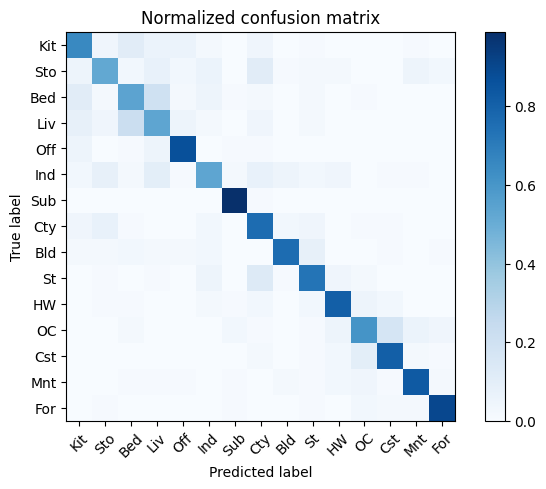

In [6]:
# SIFT + SVM
import sys
sys.argv = ['proj3.py', '--feature', 'bag_of_sift', '--classifier', 'support_vector_machine']
exec(open('proj3.py').read())

## Comparación de Descriptores: SIFT vs SURF vs BRIEF

Vamos a comparar el rendimiento de tres tipos de descriptores diferentes usando el clasificador SVM:

1. **SIFT (OpenCV)**: Scale-Invariant Feature Transform
2. **SURF (pySURF)**: Speeded-Up Robust Features - Tu implementación
3. **BRIEF (pyBRIEF)**: Binary Robust Independent Elementary Features - Tu implementación

Todos usarán:
- Bag of Words con vocabulario de 400 palabras visuales
- Clasificador SVM lineal
- Mismo conjunto de datos (15 categorías de escenas)

In [7]:
# Importar librerías necesarias
import os
import numpy as np
import pickle
from pathlib import Path
import time
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


### Paso 1: Cargar datos de entrenamiento y prueba

In [8]:
# Cargar datos
import glob
import os

DATA_DIR = '../data'

# Obtener rutas de imágenes de entrenamiento y prueba
train_image_paths = []
train_labels = []
test_image_paths = []
test_labels = []

# Cargar imágenes de entrenamiento
train_dir = os.path.join(DATA_DIR, 'train')
for category in sorted(os.listdir(train_dir)):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for img_file in glob.glob(os.path.join(category_path, '*.jpg')):
            train_image_paths.append(img_file)
            train_labels.append(category)

# Cargar imágenes de prueba
test_dir = os.path.join(DATA_DIR, 'test')
for category in sorted(os.listdir(test_dir)):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        for img_file in glob.glob(os.path.join(category_path, '*.jpg')):
            test_image_paths.append(img_file)
            test_labels.append(category)

print(f'Imágenes de entrenamiento: {len(train_image_paths)}')
print(f'Imágenes de prueba: {len(test_image_paths)}')
print(f'Categorías: {sorted(set(train_labels))}')

Imágenes de entrenamiento: 1500
Imágenes de prueba: 2985
Categorías: ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


### Evaluar SIFT (OpenCV)

In [9]:
from build_vocabulary_sift import build_vocabulary_sift

vocab_sift_file = 'vocab_sift.pkl'

if os.path.exists(vocab_sift_file):
    print(f"Cargando vocabulario SIFT existente desde {vocab_sift_file}...")
    with open(vocab_sift_file, 'rb') as f:
        vocab_sift = pickle.load(f)
    print(f"Vocabulario cargado: {vocab_sift.shape}")
else:
    # Construir vocabulario
    print("Construyendo nuevo vocabulario SIFT...")
    vocab_sift = build_vocabulary_sift(train_image_paths, vocab_size=400)

    # Guardar vocabulario para get_bags_of_sifts
    with open('vocab.pkl', 'wb') as f:
        pickle.dump(vocab_sift, f)

    print(f"Vocabulario guardado en {vocab_sift_file}")

Cargando vocabulario SIFT existente desde vocab_sift.pkl...
Vocabulario cargado: (400, 128)


In [10]:
from get_bags_of_sifts import get_bags_of_sifts

train_feats_file = 'train_feats_sift.pkl'
test_feats_file = 'test_feats_sift.pkl'

# Obtener representaciones Bag of Words
if os.path.exists(train_feats_file):
    print(f"Cargando features de entrenamiento desde {train_feats_file}...")
    with open(train_feats_file, 'rb') as f:
        train_image_feats_sift = pickle.load(f)
    print(f"Features cargados: {train_image_feats_sift.shape}")
else:
    print("Calculando features de entrenamiento...")
    train_image_feats_sift = get_bags_of_sifts(train_image_paths, vocab_sift_file)
    with open(train_feats_file, 'wb') as f:
        pickle.dump(train_image_feats_sift, f)
    print(f"Features guardados en {train_feats_file}")

if os.path.exists(test_feats_file):
    print(f"Cargando features de prueba desde {test_feats_file}...")
    with open(test_feats_file, 'rb') as f:
        test_image_feats_sift = pickle.load(f)
    print(f"Features cargados: {test_image_feats_sift.shape}")
else:
    print("Calculando features de prueba...")
    test_image_feats_sift = get_bags_of_sifts(test_image_paths, vocab_sift_file)
    with open(test_feats_file, 'wb') as f:
        pickle.dump(test_image_feats_sift, f)
    print(f"Features guardados en {test_feats_file}")

Cargando features de entrenamiento desde train_feats_sift.pkl...
Features cargados: (1500, 400)
Cargando features de prueba desde test_feats_sift.pkl...
Features cargados: (2985, 400)


In [11]:
model_file = 'classifier_sift.pkl'

# Entrenar clasificador SVM
if os.path.exists(model_file):
    print(f"Cargando modelo entrenado desde {model_file}...")
    with open(model_file, 'rb') as f:
        classifier_sift = pickle.load(f)
    print("Modelo cargado exitosamente")
else:
    print("Entrenando nuevo clasificador SVM...")
    classifier_sift = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge', max_iter=2000)
    classifier_sift.fit(train_image_feats_sift, train_labels)
    
    # Guardar modelo entrenado
    with open(model_file, 'wb') as f:
        pickle.dump(classifier_sift, f)
    print(f"Modelo guardado en {model_file}")

Cargando modelo entrenado desde classifier_sift.pkl...
Modelo cargado exitosamente


In [12]:

# Predecir
predictions_sift = classifier_sift.predict(test_image_feats_sift)
accuracy_sift = accuracy_score(test_labels, predictions_sift)
cm_sift = confusion_matrix(test_labels, predictions_sift)

### Paso 3: Evaluar SURF (pySURF)

In [27]:
from build_vocabulary_surf import build_vocabulary_surf

vocab_surf_file = 'vocab_surf.pkl'

if os.path.exists(vocab_surf_file):
    print(f"Cargando vocabulario SURF existente desde {vocab_surf_file}...")
    with open(vocab_surf_file, 'rb') as f:
        vocab_surf = pickle.load(f)
    print(f"Vocabulario cargado: {vocab_surf.shape}")
else:
    print("Construyendo nuevo vocabulario SURF...")
    # Construir vocabulario
    vocab_surf = build_vocabulary_surf(train_image_paths, vocab_size=400)

    # Guardar vocabulario para get_bags_of_surf
    with open(vocab_surf_file, 'wb') as f:
        pickle.dump(vocab_surf, f)
    print(f"Vocabulario guardado en {vocab_surf_file}")

Cargando vocabulario SURF existente desde vocab_surf.pkl...
Vocabulario cargado: (400, 64)


In [28]:
from get_bags_of_surf import get_bags_of_surf

train_feats_file = 'train_feats_surf.pkl'
test_feats_file = 'test_feats_surf.pkl'

if os.path.exists(train_feats_file):
    print(f"Cargando features de entrenamiento desde {train_feats_file}...")
    with open(train_feats_file, 'rb') as f:
        train_image_feats_surf = pickle.load(f)
    print(f"Features cargados: {train_image_feats_surf.shape}")
else:
    # Obtener representaciones Bag of Words
    train_image_feats_surf = get_bags_of_surf(train_image_paths, vocab_file=vocab_surf_file)
    with open(train_feats_file, 'wb') as f:
        pickle.dump(train_image_feats_surf, f)
    print(f"Features guardados en {train_feats_file}")

if os.path.exists(test_feats_file):
    print(f"Cargando features de prueba desde {test_feats_file}...")
    with open(test_feats_file, 'rb') as f:
        test_image_feats_surf = pickle.load(f)
    print(f"Features cargados: {test_image_feats_surf.shape}")
else:
    # Obtener representaciones Bag of Words
    test_image_feats_surf = get_bags_of_surf(test_image_paths, vocab_file=vocab_surf_file)
    with open(test_feats_file, 'wb') as f:
        pickle.dump(test_image_feats_surf, f)
    print(f"Features guardados en {test_feats_file}")


Cargando features de entrenamiento desde train_feats_surf.pkl...
Features cargados: (1500, 400)
Cargando features de prueba desde test_feats_surf.pkl...
Features cargados: (2985, 400)


In [29]:
model_file = 'classifier_surf.pkl'

if os.path.exists(model_file):
    print(f"Cargando modelo entrenado desde {model_file}...")
    with open(model_file, 'rb') as f:
        classifier_surf = pickle.load(f)
    print("Modelo cargado exitosamente")
else:
    print("Entrenando nuevo clasificador SVM...")
    # Entrenar clasificador SVM
    classifier_surf = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge', max_iter=2000)
    classifier_surf.fit(train_image_feats_surf, train_labels)

    # Guardar modelo entrenado
    with open(model_file, 'wb') as f:
        pickle.dump(classifier_surf, f)
    print(f"Modelo guardado en {model_file}")

Cargando modelo entrenado desde classifier_surf.pkl...
Modelo cargado exitosamente


In [18]:
# Predecir
predictions_surf = classifier_surf.predict(test_image_feats_surf)
accuracy_surf = accuracy_score(test_labels, predictions_surf)
cm_surf = confusion_matrix(test_labels, predictions_surf)

In [31]:
# DIAGNÓSTICO SURF
print("\n=== DIAGNÓSTICO SURF ===")
print(f"Tipo de vocab_surf: {type(vocab_surf)}")
print(f"Shape de vocab_surf: {vocab_surf.shape}")
print(f"Tipo de train_image_feats_surf: {type(train_image_feats_surf)}")
print(f"Shape de train_image_feats_surf: {train_image_feats_surf.shape}")
print(f"Tipo de test_image_feats_surf: {type(test_image_feats_surf)}")
print(f"Shape de test_image_feats_surf: {test_image_feats_surf.shape}")


=== DIAGNÓSTICO SURF ===
Tipo de vocab_surf: <class 'numpy.ndarray'>
Shape de vocab_surf: (400, 64)
Tipo de train_image_feats_surf: <class 'numpy.ndarray'>
Shape de train_image_feats_surf: (1500, 400)
Tipo de test_image_feats_surf: <class 'numpy.ndarray'>
Shape de test_image_feats_surf: (2985, 400)


In [32]:
print(f"\nPrimera imagen train - sum: {train_image_feats_surf[0].sum()}")
print(f"Primera imagen train - min/max: {train_image_feats_surf[0].min()}, {train_image_feats_surf[0].max()}")
print(f"\nPrimera imagen test - sum: {test_image_feats_surf[0].sum()}")
print(f"Primera imagen test - min/max: {test_image_feats_surf[0].min()}, {test_image_feats_surf[0].max()}")



Primera imagen train - sum: 1.0
Primera imagen train - min/max: 0.0, 1.0

Primera imagen test - sum: 0.0
Primera imagen test - min/max: 0.0, 0.0


In [33]:
print("\n=== COMPARACIÓN CON SIFT ===")
print(f"SIFT train - sum primera imagen: {train_image_feats_sift[0].sum()}")
print(f"SURF train - sum primera imagen: {train_image_feats_surf[0].sum()}")


=== COMPARACIÓN CON SIFT ===
SIFT train - sum primera imagen: 1.0
SURF train - sum primera imagen: 1.0


In [ ]:
# Test rápido de detección SURF
import cv2
from pysurf import pySURF

test_img = cv2.imread(train_image_paths[0], 0)
surf = SURF()
kp, desc = surf.detectAndCompute(test_img)

print(f"Imagen de prueba: {train_image_paths[0]}")
print(f"Keypoints detectados: {len(kp)}")
print(f"Descriptores shape: {desc.shape if desc is not None else 'None'}")
print(f"Descriptor[0] primeros 10 valores: {desc[0][:10] if desc is not None else 'None'}")
print(f"Descriptor[0] sum: {desc[0].sum() if desc is not None else 'None'}")

# Comparar con SIFT
sift = cv2.SIFT_create()
kp_sift, desc_sift = sift.detectAndCompute(test_img, None)

print(f"\nSIFT Keypoints: {len(kp_sift)}")
print(f"SIFT Descriptores shape: {desc_sift.shape}")
print(f"SIFT Descriptor[0] primeros 10 valores: {desc_sift[0][:10]}")

ModuleNotFoundError: No module named 'pySURF'

### Paso 4: Evaluar BRIEF (pyBRIEF)

In [20]:
from build_vocabulary_brief import build_vocabulary_brief

vocab_brief_file = 'vocab_brief.pkl'

if os.path.exists(vocab_brief_file):
    print(f"Cargando vocabulario existente desde {vocab_brief_file}...")
    with open(vocab_brief_file, 'rb') as f:
        vocab_brief = pickle.load(f)
    print(f"Vocabulario cargado: {vocab_brief.shape}")
else:
    print("Construyendo nuevo vocabulario BRIEF...")

    vocab_brief = build_vocabulary_brief(train_image_paths, vocab_size=400)
    
    # Guardar vocabulario para get_bags_of_brief
    with open(vocab_brief_file, 'wb') as f:
        pickle.dump(vocab_brief, f)
    print(f"Vocabulario guardado en {vocab_brief_file}")

Cargando vocabulario existente desde vocab_brief.pkl...
Vocabulario cargado: (400, 32)


In [21]:

# Obtener representaciones Bag of Words
from get_bags_of_brief import get_bags_of_brief

train_feats_file = 'train_feats_brief.pkl'
test_feats_file = 'test_feats_brief.pkl'

if os.path.exists(test_feats_file):
    print(f"Cargando features de prueba desde {test_feats_file}...")
    with open(test_feats_file, 'rb') as f:
        test_image_feats_brief = pickle.load(f)
    print(f"Features cargados: {test_image_feats_brief.shape}")
else:
    print("Calculando features de prueba...")
    test_image_feats_brief = get_bags_of_brief(test_image_paths, vocab_file='vocab_brief.pkl')
    with open(test_feats_file, 'wb') as f:
        pickle.dump(test_image_feats_brief, f)
    print(f"Features guardados en {test_feats_file}")

if os.path.exists(train_feats_file):
    print(f"Cargando features de entrenamiento desde {train_feats_file}...")
    with open(train_feats_file, 'rb') as f:
        train_image_feats_brief = pickle.load(f)
    print(f"Features cargados: {train_image_feats_brief.shape}")
else:
    print("Calculando features de entrenamiento...")
    train_image_feats_brief = get_bags_of_brief(train_image_paths, vocab_file='vocab_brief.pkl')
    with open(train_feats_file, 'wb') as f:
        pickle.dump(train_image_feats_brief, f)
    print(f"Features guardados en {train_feats_file}")


Cargando features de prueba desde test_feats_brief.pkl...
Features cargados: (2985, 400)
Cargando features de entrenamiento desde train_feats_brief.pkl...
Features cargados: (1500, 400)


In [22]:
model_file = 'classifier_brief.pkl' 

# Entrenar clasificador SVM
if os.path.exists(model_file):
    print(f"Cargando modelo entrenado desde {model_file}...")
    with open(model_file, 'rb') as f:
        classifier_brief = pickle.load(f)
    print("Modelo cargado exitosamente")
else:
    print("Entrenando nuevo clasificador SVM...")
    classifier_brief = svm.LinearSVC(random_state=0, tol=1e-5, loss='hinge', max_iter=2000)
    classifier_brief.fit(train_image_feats_brief, train_labels)

    # Guardar modelo entrenado
    with open(model_file, 'wb') as f:
        pickle.dump(classifier_brief, f)
    print(f"Modelo guardado en {model_file}")

Cargando modelo entrenado desde classifier_brief.pkl...
Modelo cargado exitosamente


In [23]:
# Predecir
predictions_brief = classifier_brief.predict(test_image_feats_brief)
accuracy_brief = accuracy_score(test_labels, predictions_brief)
cm_brief = confusion_matrix(test_labels, predictions_brief)

### Paso 5: Comparación de Resultados

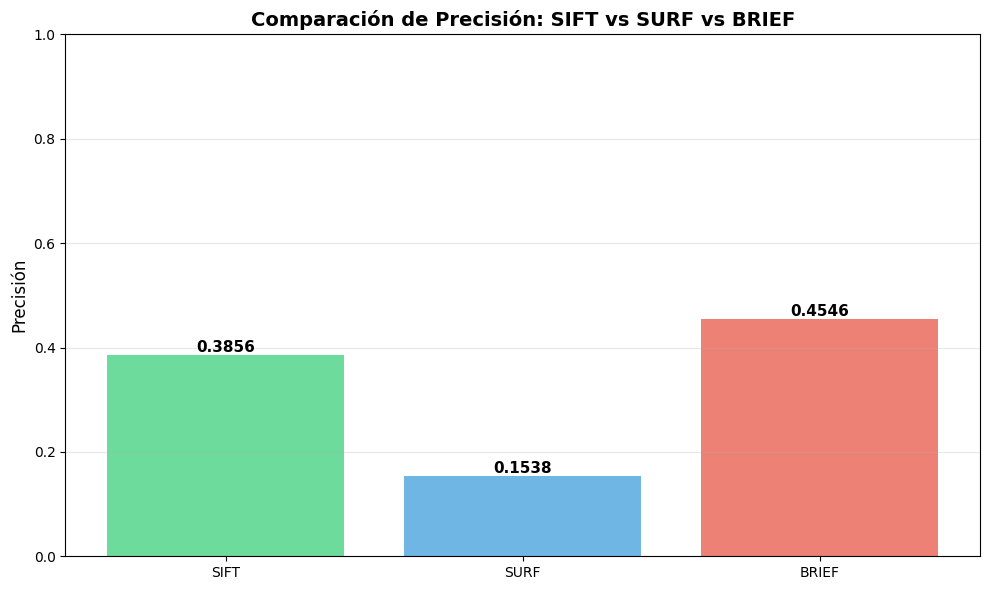

In [30]:
# Comparación de precisión
fig, ax = plt.subplots(figsize=(10, 6))
methods = ['SIFT', 'SURF', 'BRIEF']
accuracies = [accuracy_sift, accuracy_surf, accuracy_brief]
colors = ['#2ecc71', '#3498db', '#e74c3c']

bars = ax.bar(methods, accuracies, color=colors, alpha=0.7)
ax.set_ylabel('Precisión', fontsize=12)
ax.set_title('Comparación de Precisión: SIFT vs SURF vs BRIEF', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


### Paso 6: Matrices de Confusión

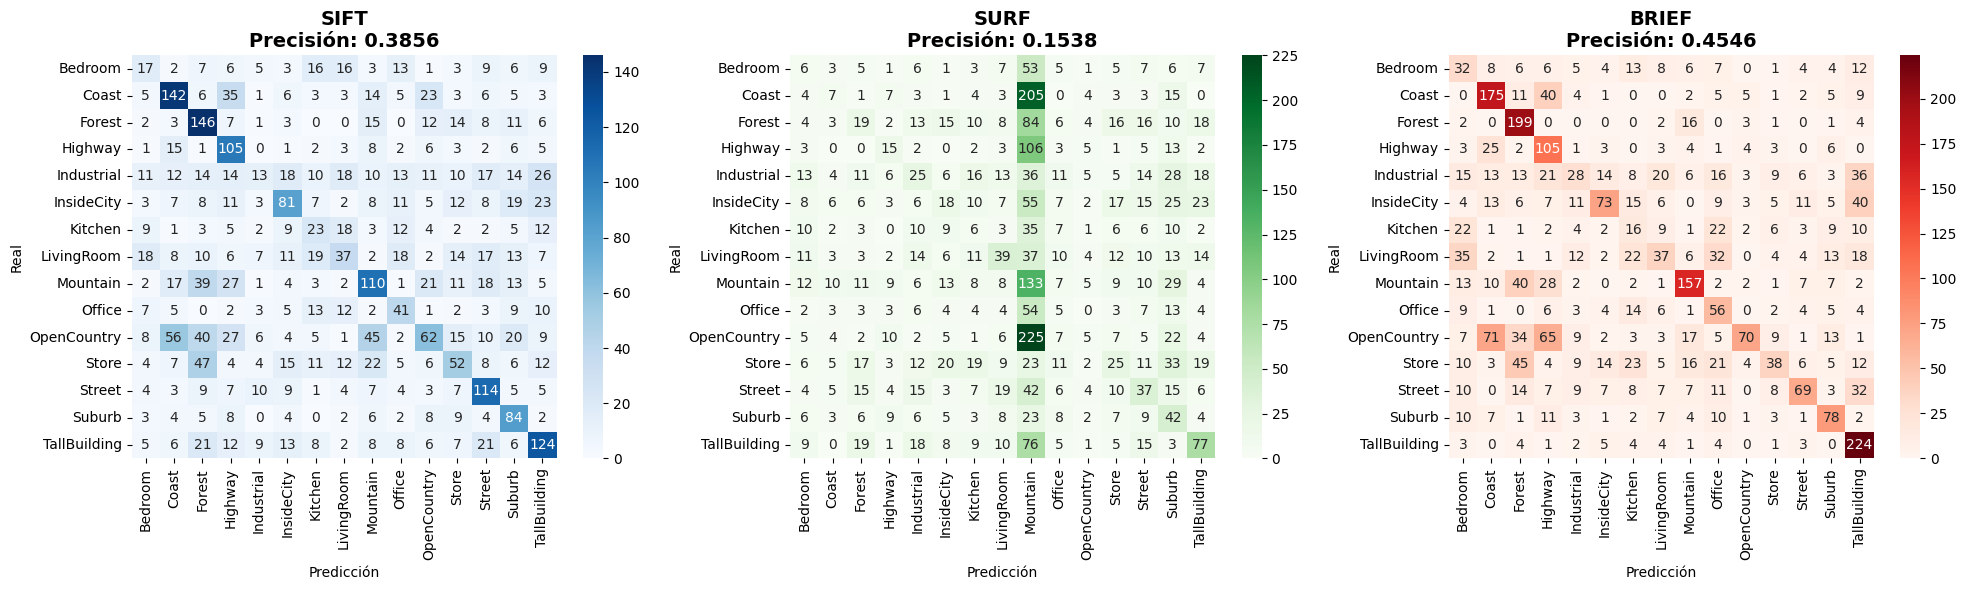

In [25]:
# Visualizar las tres matrices de confusión
categories = sorted(set(test_labels))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# SIFT
sns.heatmap(cm_sift, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories, ax=axes[0])
axes[0].set_title(f'SIFT\nPrecisión: {accuracy_sift:.4f}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# SURF
sns.heatmap(cm_surf, annot=True, fmt='d', cmap='Greens',
            xticklabels=categories, yticklabels=categories, ax=axes[1])
axes[1].set_title(f'SURF\nPrecisión: {accuracy_surf:.4f}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

# BRIEF
sns.heatmap(cm_brief, annot=True, fmt='d', cmap='Reds',
            xticklabels=categories, yticklabels=categories, ax=axes[2])
axes[2].set_title(f'BRIEF\nPrecisión: {accuracy_brief:.4f}', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Predicción')
axes[2].set_ylabel('Real')

plt.tight_layout()
plt.show()

In [ ]:
%cd ..

/Users/joelibaceta/Projects/examen-parcial-computer-vision/Scene-Recognition-with-Bag-of-Words
